# Capstone Project

**Top Ten population cities of USA VS Hamburg of Germany**

import libraries (the package might need to be installed before import, it depends on user system)

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


read data source

In [6]:
url = 'https://raw.githubusercontent.com/baerchen42/Coursera_Capstone/master/TopTenUSAGeo.csv'
df_cities = pd.read_csv(url)
df_cities

,city,cityLabel,population,pa_s,pa_sLabel,coordenadas
0,wd:Q60,New York City,8398748,wd:Q30,United States of America,Point(-73.94 40.67)
1,wd:Q65,Los Angeles,3976322,wd:Q30,United States of America,Point(-118.24368 34.05223)
2,wd:Q1297,Chicago,2722389,wd:Q30,United States of America,Point(-87.627777777 41.881944444)
3,wd:Q16555,Houston,2195914,wd:Q30,United States of America,Point(-95.383055555 29.762777777)
4,wd:Q16556,Phoenix,1626078,wd:Q30,United States of America,Point(-112.076388888 33.528333333)
5,wd:Q1345,Philadelphia,1580863,wd:Q30,United States of America,Point(-75.163611111 39.952777777)
6,wd:Q975,San Antonio,1436697,wd:Q30,United States of America,Point(-98.493888888 29.425)
7,wd:Q16552,San Diego,1394928,wd:Q30,United States of America,Point(-117.1625 32.715)
8,wd:Q16557,Dallas,1197816,wd:Q30,United States of America,Point(-96.808888888 32.779166666)
9,wd:Q16553,San Jose,1025350,wd:Q30,United States of America,Point(-121.872777777 37.304166666)


clean data form

In [7]:
#rename columns
df_cities.columns=['city data link','City','Population','country data link','Country','Coordinates']
#split coordinates
df_cities[['Longitude','Latitude']] = df_cities['Coordinates'].str.split(' ',expand=True)
#clean coordinates
df_cities['Longitude'] = df_cities['Longitude'].str[6:]
df_cities['Latitude'] = df_cities['Latitude'].str[:-1]
#drop Coordinates as it's not needed anymore
df_cities.drop('Coordinates',axis=1, inplace=True)
df_cities

,city data link,City,Population,country data link,Country,Longitude,Latitude
0,wd:Q60,New York City,8398748,wd:Q30,United States of America,-73.94,40.67
1,wd:Q65,Los Angeles,3976322,wd:Q30,United States of America,-118.24368,34.05223
2,wd:Q1297,Chicago,2722389,wd:Q30,United States of America,-87.627777777,41.881944444
3,wd:Q16555,Houston,2195914,wd:Q30,United States of America,-95.383055555,29.762777777
4,wd:Q16556,Phoenix,1626078,wd:Q30,United States of America,-112.076388888,33.528333333
5,wd:Q1345,Philadelphia,1580863,wd:Q30,United States of America,-75.163611111,39.952777777
6,wd:Q975,San Antonio,1436697,wd:Q30,United States of America,-98.493888888,29.425
7,wd:Q16552,San Diego,1394928,wd:Q30,United States of America,-117.1625,32.715
8,wd:Q16557,Dallas,1197816,wd:Q30,United States of America,-96.808888888,32.779166666
9,wd:Q16553,San Jose,1025350,wd:Q30,United States of America,-121.872777777,37.304166666


In [8]:
df_cities.dtypes

city data link       object
City                 object
Population            int64
country data link    object
Country              object
Longitude            object
Latitude             object
dtype: object

coordination have to be float

In [9]:
df_cities['Latitude']=df_cities['Latitude'].astype(float)
df_cities['Longitude']=df_cities['Longitude'].astype(float)
df_cities.dtypes

city data link        object
City                  object
Population             int64
country data link     object
Country               object
Longitude            float64
Latitude             float64
dtype: object

### show cities in map

show position of Hamburg and USA cities

In [11]:
map_world = folium.Map()

# add markers to map
# add markers to map
for lat, lng, city in zip(df_cities['Latitude'], df_cities['Longitude'], df_cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_world)  
    
map_world

### Foursquare : Completing data with venues 
Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

we do not use getNearbyVenues function, because it will get not enough values

we will use https://github.com/dacog/foursquare_api_tools to get venues

In [13]:
import foursquare as fs
from foursquare_api_tools import foursquare_api_tools as ft
import sys
import time
output_stream = sys.stdout
import time

In [15]:
#create an empty df
venues_ft = pd.DataFrame()
#define queries we want to pass the function. This are the categories we are interested in.
queries=['school','university','hospital','restaurant','coffee','entertainment','shops','playground','nightlife','lodging']

# Construct the client object as instructed in foursquare package
client = fs.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, version=VERSION)

#let's print for how many cities are we going to search for venues
print('I have to look for ',df_cities.shape[0],' cities.')
i=0
for i in range(i,df_cities.shape[0]):
    lat = df_cities.iloc[i,df_cities.columns.get_loc('Latitude')]
    long = df_cities.iloc[i,df_cities.columns.get_loc('Longitude')]
    #print(lat,long)
    try:
        for query in queries:
            new_venues=ft.venues_explore(client,lat=str(lat),lng=str(long),limit=1000, offset=2,query=query)
            #foursquare give names of country and city in original langage and/or user submited of the place. We need the normal ones.
            new_venues['Country2']=df_cities.iloc[i,df_cities.columns.get_loc('Country')]
            new_venues['City2']=df_cities.iloc[i,df_cities.columns.get_loc('City')]
            new_venues['Query']=query
            venues_ft=venues_ft.append(new_venues)
            #print('shape %s\r'% venues_ft.shape) #for debug
    except:
        #print('%s\r has no data' % i) #for debug
        pass
    output_stream.write('%s\r' % i)
    output_stream.flush()

#use this in case you excecuted the for loop to get the venues from foursquare
df_DeCl_venues=venues_ft

#we save the new dataframe as it takes a while to get all the venues.
df_DeCl_venues.to_csv('revenue.csv', index = False)
print('I got {} venues with {} columns' .format(venues_ft.shape[0],venues_ft.shape[1]))

I have to look for  11  cities.
I got 7536 venues with 11 columns


In [16]:
df_DeCl_venues.head()

,index,Name,City,Latitude,Longitude,Category,Address,Country,Country2,City2,Query
0,0,PS 156 Waverly School of the Arts,Brownsville,40.665677,-73.917712,School,104 Sutter Avenue,United States,United States of America,New York City,school
1,0,Magic Kingdom Nursery School,Brooklyn,40.670182,-73.942099,School,Kingston Ave @ Lincoln Place,United States,United States of America,New York City,school
2,0,Dr. Eliot Kaplan,Brooklyn,40.669957,-73.943090,School,763 Eastern Pkwy,United States,United States of America,New York City,school
3,0,I.S. 390,Brooklyn,40.671889,-73.937134,School,1224 Park Pl,United States,United States of America,New York City,school
4,0,KIPP: AMP Academy,Brooklyn,40.672205,-73.937087,School,,United States,United States of America,New York City,school


In [17]:
df_usa_venues = df_DeCl_venues
df_usa_venues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7536 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      7536 non-null   int64  
 1   Name       7536 non-null   object 
 2   City       7536 non-null   object 
 3   Latitude   7536 non-null   float64
 4   Longitude  7536 non-null   float64
 5   Category   7536 non-null   object 
 6   Address    7536 non-null   object 
 7   Country    7536 non-null   object 
 8   Country2   7536 non-null   object 
 9   City2      7536 non-null   object 
 10  Query      7536 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 706.5+ KB


In [18]:
len(df_usa_venues['Category'].unique())

287

In [19]:
df_usa_venues_combine=df_usa_venues.replace(to_replace=['Asian Restaurant','Himalayan Restaurant','Japanese Curry Restaurant','Pakistani Restaurant','Szechuan Restaurant','Malay Restaurant','North Indian Restaurant','Shanghai Restaurant','Soba Restaurant','South Indian Restaurant','Udon Restaurant','Indian Restaurant','Taiwanese Restaurant','Chinese Restaurant','Japanese Restaurant','Thai Restaurant','Ramen Restaurant','Sushi Restaurant','Dumpling Restaurant','Filipino Restaurant','Vietnamese Restaurant','Korean Restaurant','Dim Sum Restaurant','Asian Restaurant']
                            ,value ="Asian Restaurant").replace(to_replace=['Austrian Restaurant','Czech Restaurant','Eastern European Restaurant','European Restaurant','Russian Restaurant','English Restaurant','Paella Restaurant','Spanish Restaurant','Swiss Restaurant','Turkish Restaurant','Italian Restaurant','French Restaurant','Modern European Restaurant','Portuguese Restaurant','German Restaurant','Belgian Restaurant','Greek Restaurant','Restaurant','Italian Restaurant']
                            ,value ="European Restaurant").replace(to_replace=['Moroccan Restaurant','Ethiopian Restaurant']
                            ,value ="African Restaurant").replace(to_replace=['Hotpot Restaurant','Taco Place','Steakhouse','Soup Place','Sandwich Place','Salad Place','Fried Chicken Joint','Food Court','Food Truck','Pizza Place','Snack Place','Comfort Food Restaurant','Diner','Theme Restaurant','Doner Restaurant','Fast Food Restaurant','Molecular Gastronomy Restaurant','Mediterranean Restaurant','Seafood Restaurant','Vegetarian / Vegan Restaurant','Gluten-free Restaurant']
                            ,value="Other Food Place").replace(to_replace=['Middle Eastern Restaurant','Falafel Restaurant','Afghan Restaurant','Lebanese Restaurant','Arepa Restaurant']
                            ,value="Midle East Restaurant").replace(to_replace=['Argentinian Restaurant','Cambodian Restaurant','Peruvian Restaurant','South American Restaurant','Venezuelan Restaurant','Cuban Restaurant','Latin American Restaurant','Tapas Restaurant','Colombian Restaurant','Mexican Restaurant','Latin American Restaurant','Brazilian Restaurant']
                            ,value="Latin American Restaurant").replace(to_replace=['American Restaurant','Hawaiian Restaurant','Southern / Soul Food Restaurant','New American Restaurant','American Restaurant']
                            ,value="American Restaurant").replace(to_replace=['Israeli Restaurant','Jewish Restaurant','Kosher Restaurant']
                            ,value="Israeli/Jawish Restaurant").replace(to_replace=[ 'Sports Club','Pool','Mini Golf','Baseball Field','Climbing Gym','Gymnastics Gym','Boxing Gym','Athletics & Sports','Gym','Gym Pool',' Athletics & Sports','Basketball Stadium', 'Baseball Stadium', 'Gym / Fitness Center']
                            ,value="Sport place").replace(to_replace=['Volleyball Court','Tiki Bar','Tennis Court','Tennis Stadium','Music School','College Academic Building','College Cafeteria','College Theater','College Bookstore','General College & University', 'College Arts Building','College Gym', 'College Rec Center']
                            ,value="School/Education").replace(to_replace=['High School','Board Shop','Bridal Shop','Duty-free Shop','Bike Shop','Flower Shop','Frozen Yogurt Shop','Mobile Phone Shop','Pie Shop','Supplement Shop','Watch Shop','Wine Shop','Shop/Store','Used Bookstore','Womens Store','Big Box Store','Candy Store','Drugstore','Hardware Store','Herbs & Spices Store','Kids Store','Leather Goods Store','Mens Store','Music Store','Paper / Office Supplies Store','Shipping Store','Video Store','Boutique','Supermarket','Adult Boutique','Bagel Shop','Bubble Tea Shop','Cupcake Shop','Food & Drink Shop','Antique Shop','Chocolate Shop','Coffee Shop','Comic Shop','Cosmetics Shop','Dessert Shop','Donut Shop','Gourmet Shop','Hobby Shop','Ice Cream Shop','Miscellaneous Shop','Optical Shop','Record Shop','Salon / Barbershop','Shopping Mall','Smoke Shop','Smoothie Shop','Sporting Goods Shop','Tailor Shop','Cheese Shop','Discount Store','Electronics Store','Clothing Store', 'Gift Shop','Furniture / Home Store','Shoe Store','Toy / Game Store','Video Game Store','"Mens Store"','Accessories Store','Arts & Crafts Store','Baby Store','Beer Store','Bookstore','Camera Store','Convenience Store','Department Store','Health Food Store','Jewelry Store','Lingerie Store','Liquor Store','Pet Store','Thrift / Vintage Store']
                            ,value="Shop/Store").replace(to_replace =['Organic Grocery','Grocery Store']
                            ,value ="Grocery").replace(to_replace =['Hostel','Hotel','Hotel Bar']
                            ,value ="Hotel").replace(to_replace =['Memorial Site','Museum','Historic Site','Public Art','Cultural Center','Art Gallery','Art Museum','Monument / Landmark','History Museum','Performing Arts Venue','Sculpture Garden']
                            ,value ="Art/Museum").replace(to_replace =['Airport Food Court','Airport Gate','Airport Service']
                            ,value ="Airport").replace(to_replace =['Cafeteria','Café'] 
                            ,value ="Coffee Shop").replace(to_replace =['Whisky Bar','Wine Bar','Piano Bar','Dive Bar','Pub','Beer Bar' ,'Irish Pub','Cocktail Bar']
                            ,value ="Bar").replace(to_replace =['Flea Market','Farmers Market','Fish Market','Market']
                            ,value ="Market")

In [20]:
len(df_usa_venues_combine['Category'].unique())

156

we reduce the category from 287 to 156 for cities

#### One Hot encoding of the categories

In [21]:
# one hot encoding
cities_onehot = pd.get_dummies(df_usa_venues_combine[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['City'] = df_usa_venues_combine['City2'] 

# move neighborhood column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped

,City,Adult Education Center,Advertising Agency,African Restaurant,American Restaurant,Aquarium,Arcade,Art/Museum,Asian Restaurant,Astrologer,Auto Workshop,BBQ Joint,Bakery,Bar,Bavarian Restaurant,Beer Garden,Bistro,Boat or Ferry,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Business Service,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Church,Churrascaria,Coffee Roaster,Coffee Shop,College Administrative Building,College Classroom,College Residence Hall,College Science Building,College Technology Building,Community College,Concert Hall,Construction & Landscaping,Cooking School,Creperie,Dance Studio,Daycare,Deli / Bodega,Doctor's Office,Driving School,Dry Cleaner,Elementary School,Emergency Room,Empanada Restaurant,European Restaurant,Event Space,Eye Doctor,Fair,Field,Food,Food Service,Fruit & Vegetable Store,Garden Center,Gastropub,Gay Bar,General Entertainment,Government Building,Grocery,Health & Beauty Service,Home Service,Hookah Bar,Hospital,Hospital Ward,Hot Dog Joint,Hotel,IT Services,Indonesian Restaurant,Insurance Office,Israeli/Jawish Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kitchen Supply Store,Language School,Latin American Restaurant,Laundromat,Law School,Lawyer,Library,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Massage Studio,Medical Center,Medical School,Medical Supply Store,Men's Store,Middle School,Midle East Restaurant,Mobility Store,Motorcycle Shop,Music Venue,Nightclub,Nightlife Spot,Noodle House,Nursery School,Office,Opera House,Other Event,Other Food Place,Other Nightlife,Other Repair Shop,Outlet Store,Park,Perfume Shop,Pharmacy,Photography Studio,Pide Place,Pier,Playground,Plaza,Poke Place,Polish Restaurant,Preschool,Print Shop,Private School,Recording Studio,Recreation Center,Religious School,Rock Club,Roof Deck,Scandinavian Restaurant,School,School/Education,Science Museum,Shoe Repair,Shop/Store,Shopping Plaza,Speakeasy,Spiritual Center,Sport place,Sports Bar,Stationery Store,Street Food Gathering,Student Center,Swabian Restaurant,Swim School,Tea Room,Tech Startup,Temple,Theater,Trade School,Trattoria/Osteria,University,Winery,Wings Joint,Women's Store,Yoshoku Restaurant
0,Chicago,0.000000,0.000000,0.000000,0.031354,0.000000,0.001334,0.000000,0.008005,0.000000,0.000000,0.002668,0.008005,0.050033,0.000000,0.000000,0.000000,0.000000,0.002668,0.004003,0.000000,0.001334,0.005337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017345,0.001334,0.000000,0.001334,0.000000,0.000000,0.001334,0.000000,0.000000,0.000000,0.000000,0.000000,0.004003,0.000000,0.004003,0.000000,0.000000,0.005337,0.005337,0.000000,0.033356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008005,0.000000,0.102068,0.000000,0.014676,0.000000,0.000000,0.000000,0.111408,0.004003,0.001334,0.014009,0.000000,0.000000,0.000000,0.00000,0.004003,0.000000,0.000000,0.000000,0.009340,0.012008,0.000000,0.001334,0.000000,0.000000,0.000000,0.006671,0.000000,0.000000,0.006671,0.001334,0.001334,0.000000,0.000000,0.001334,0.000000,0.009340,0.000000,0.000000,0.004003,0.001334,0.001334,0.001334,0.006004,0.004003,0.000000,0.000000,0.078052,0.000000,0.000000,0.000000,0.011341,0.000000,0.008005,0.000000,0.000000,0.002668,0.008005,0.000000,0.000000,0.001334,0.002668,0.000000,0.001334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062041,0.022682,0.001334,0.001334,0.199466,0.000000,0.001334,0.001334,0.000000,0.002668,0.001334,0.000000,0.002668,0.000000,0.000000,0.005337,0.001334,0.001334,0.000000,0.005337,0.000000,0.054036,0.001334,0.000000,0.006671,0.000000
1,Dallas,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072727,0.000000,0.000000,0.036364,0.000000,0.000000,0.0

### Selecting top 5 venues for each cities

11 cities top 5 venues

In [22]:
num_top_venues = 5

for city in cities_grouped['City']:
    print("----"+city+"----")
    temp = cities_grouped[cities_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chicago----
                   venue  freq
0             Shop/Store  0.20
1               Hospital  0.11
2  General Entertainment  0.10
3       Other Food Place  0.08
4                 School  0.06


----Dallas----
                    venue  freq
0  Adult Education Center  0.15
1              Shop/Store  0.15
2               Preschool  0.11
3       Elementary School  0.07
4                 Daycare  0.07


----Hamburg----
                 venue  freq
0           Shop/Store  0.27
1          Coffee Shop  0.11
2  European Restaurant  0.10
3                  Bar  0.09
4     Other Food Place  0.05


----Houston----
                 venue  freq
0           Shop/Store  0.24
1                  Bar  0.11
2     Other Food Place  0.10
3  European Restaurant  0.04
4              Gay Bar  0.03


----Los Angeles----
                   venue  freq
0             Shop/Store  0.29
1                    Bar  0.08
2  General Entertainment  0.07
3       Asian Restaurant  0.06
4            Coffee Shop  0.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chicago,Shop/Store,Hospital,General Entertainment,Other Food Place,School
1,Dallas,Adult Education Center,Shop/Store,Preschool,Community College,Daycare
2,Hamburg,Shop/Store,Coffee Shop,European Restaurant,Bar,Other Food Place
3,Houston,Shop/Store,Bar,Other Food Place,European Restaurant,General Entertainment
4,Los Angeles,Shop/Store,Bar,General Entertainment,Asian Restaurant,Other Food Place
5,New York City,Shop/Store,School,Coffee Shop,Bar,Other Food Place
6,Philadelphia,Shop/Store,Hospital,School,Other Food Place,Bar
7,Phoenix,School,Elementary School,Shop/Store,Church,School/Education
8,San Antonio,Shop/Store,Hospital,Other Food Place,General Entertainment,European Restaurant
9,San Diego,School,Elementary School,Shop/Store,Language School,Adult Education Center


### Clustering

we will use K-Mean clustering method and try to find the optimal k value by ploting them to determine a "elbow" point.

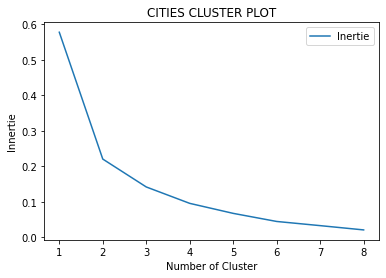

In [24]:
import matplotlib.pyplot as plt

# instantiate the dataframe
USA_inertia_Df = pd.DataFrame(columns=['ClusterNumber', 'Inertie'])

usa_cities_grouped_clustering = cities_grouped.drop('City', 1)
for k in range (1, 9):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    cities_kmeans_model = KMeans(n_clusters=k, random_state=0).fit(usa_cities_grouped_clustering)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
   # Downtown_Toronto_labels = Downtown_Toronto_kmeans_model.labels_[0:10]
    # Sum of distances of samples to their closest cluster center
    cities_inertia = cities_kmeans_model.inertia_
    #print ("k:",k, " cost:",   Downtown_Toronto_interia)
    USA_inertia_Df = USA_inertia_Df.append({'ClusterNumber': k,
                                          'Inertie': cities_inertia,
                                                     }, ignore_index=True)
    
USA_inertia_Df = USA_inertia_Df.set_index("ClusterNumber")

# Ploting de results
USA_inertia_Df.index = USA_inertia_Df.index.map(int)
USA_inertia_Df.plot(kind='line')

plt.title('CITIES CLUSTER PLOT')
plt.ylabel('Innertie')
plt.xlabel('Number of Cluster')

plt.show() 

we choose K = 2 as optimal value

In [28]:
# set number of clusters
kclusters = 2

cities_grouped_clustering = cities_grouped.drop('City', 1)
cities_kmeans_model = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels K-Means', cities_kmeans_model.labels_)

city_merged = df_cities

# merge to add latitude/longitude for each neighborhood
city_merged = city_merged.join(city_venues_sorted.set_index('City'), on='City')

city_merged.head()

,city data link,City,Population,country data link,Country,Longitude,Latitude,Cluster Labels K-Means,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,wd:Q60,New York City,8398748,wd:Q30,United States of America,-73.940000,40.670000,0,Shop/Store,School,Coffee Shop,Bar,Other Food Place
1,wd:Q65,Los Angeles,3976322,wd:Q30,United States of America,-118.243680,34.052230,0,Shop/Store,Bar,General Entertainment,Asian Restaurant,Other Food Place
2,wd:Q1297,Chicago,2722389,wd:Q30,United States of America,-87.627778,41.881944,0,Shop/Store,Hospital,General Entertainment,Other Food Place,School
3,wd:Q16555,Houston,2195914,wd:Q30,United States of America,-95.383056,29.762778,0,Shop/Store,Bar,Other Food Place,European Restaurant,General Entertainment
4,wd:Q16556,Phoenix,1626078,wd:Q30,United States of America,-112.076389,33.528333,1,School,Elementary School,Shop/Store,Church,School/Education


visualization cluster

In [29]:
# create map
map_clusters = folium.Map()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], city_merged['Longitude'], city_merged['City'], city_merged['Cluster Labels K-Means']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyse Clusters

first sub cluster 

In [30]:
city_merged.loc[city_merged['Cluster Labels K-Means'] == 0, 
                     city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,Longitude,Latitude,Cluster Labels K-Means,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,New York City,-73.940000,40.670000,0,Shop/Store,School,Coffee Shop,Bar,Other Food Place
1,Los Angeles,-118.243680,34.052230,0,Shop/Store,Bar,General Entertainment,Asian Restaurant,Other Food Place
2,Chicago,-87.627778,41.881944,0,Shop/Store,Hospital,General Entertainment,Other Food Place,School
3,Houston,-95.383056,29.762778,0,Shop/Store,Bar,Other Food Place,European Restaurant,General Entertainment
5,Philadelphia,-75.163611,39.952778,0,Shop/Store,Hospital,School,Other Food Place,Bar
6,San Antonio,-98.493889,29.425000,0,Shop/Store,Hospital,Other Food Place,General Entertainment,European Restaurant
8,Dallas,-96.808889,32.779167,0,Adult Education Center,Shop/Store,Preschool,Community College,Daycare
10,Hamburg,10.000000,53.550000,0,Shop/Store,Coffee Shop,European Restaurant,Bar,Other Food Place


In this first cluster, we have mostly Shop/stores, only Dallas has Adulut Education Center as the 1st most common venue, then we might study it later

2nd sub cluster

In [31]:
city_merged.loc[city_merged['Cluster Labels K-Means'] == 1, 
                     city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,Longitude,Latitude,Cluster Labels K-Means,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Phoenix,-112.076389,33.528333,1,School,Elementary School,Shop/Store,Church,School/Education
7,San Diego,-117.162500,32.715000,1,School,Elementary School,Shop/Store,Language School,Adult Education Center
9,San Jose,-121.872778,37.304167,1,Elementary School,School,Church,Preschool,Shop/Store


In this second cluster, we have mostly school

#### brief conclusion: for peope move from Hamburg, if people decide choose similar cities, then should choose from first cluster; if they put more eyes on education, then should choose second cluster

as mentioned before, we are not sure about if Dallas in the first cluster correct or not, then we use another way to check

### Use own data to cluster, instead of foursquare

In [33]:
df_DeCl_venues.groupby('City2').count()

,index,Name,City,Latitude,Longitude,Category,Address,Country,Country2,Query
City2,,,,,,,,,,
Chicago,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499
Dallas,55,55,55,55,55,55,55,55,55,55
Hamburg,931,931,931,931,931,931,931,931,931,931
Houston,834,834,834,834,834,834,834,834,834,834
Los Angeles,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049
New York City,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
Philadelphia,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
Phoenix,43,43,43,43,43,43,43,43,43,43
San Antonio,701,701,701,701,701,701,701,701,701,701


In [37]:
# one hot encoding
cities_onehot_query = pd.get_dummies(df_DeCl_venues[['Query']], prefix="", prefix_sep="")

cities_onehot_query['City'] = df_DeCl_venues['City2'] 

fixed_columns = [cities_onehot_query.columns[-1]] + list(cities_onehot_query.columns[:-1])
cities_onehot_query = cities_onehot_query[fixed_columns]

cities_grouped_query = cities_onehot_query.groupby('City').mean().reset_index()
cities_grouped_query

,City,coffee,entertainment,hospital,lodging,nightlife,playground,restaurant,school,shops,university
0,Chicago,0.133422,0.124750,0.127418,0.002001,0.133422,0.020680,0.133422,0.133422,0.133422,0.058039
1,Dallas,0.000000,0.000000,0.054545,0.000000,0.000000,0.000000,0.000000,0.854545,0.000000,0.090909
2,Hamburg,0.214823,0.016112,0.003222,0.000000,0.214823,0.009667,0.214823,0.084855,0.214823,0.026853
3,Houston,0.147482,0.049161,0.020384,0.000000,0.239808,0.005995,0.239808,0.053957,0.239808,0.003597
4,Los Angeles,0.190658,0.090562,0.027645,0.000000,0.190658,0.014299,0.190658,0.094376,0.190658,0.010486
5,New York City,0.172655,0.012974,0.044910,0.000000,0.126747,0.036926,0.199601,0.199601,0.199601,0.006986
6,Philadelphia,0.152672,0.064885,0.110687,0.000000,0.152672,0.023664,0.152672,0.152672,0.152672,0.037405
7,Phoenix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
8,San Antonio,0.158345,0.087019,0.092725,0.000000,0.000000,0.000000,0.285307,0.069900,0.285307,0.021398
9,San Diego,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [38]:
num_top_venues = 5

for city in cities_grouped_query['City']:
    print("----"+city+"----")
    temp = cities_grouped_query[cities_grouped_query['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chicago----
        venue  freq
0      coffee  0.13
1    hospital  0.13
2   nightlife  0.13
3  restaurant  0.13
4      school  0.13


----Dallas----
           venue  freq
0         school  0.85
1     university  0.09
2       hospital  0.05
3         coffee  0.00
4  entertainment  0.00


----Hamburg----
        venue  freq
0      coffee  0.21
1   nightlife  0.21
2  restaurant  0.21
3       shops  0.21
4      school  0.08


----Houston----
           venue  freq
0      nightlife  0.24
1     restaurant  0.24
2          shops  0.24
3         coffee  0.15
4  entertainment  0.05


----Los Angeles----
           venue  freq
0         coffee  0.19
1      nightlife  0.19
2     restaurant  0.19
3          shops  0.19
4  entertainment  0.09


----New York City----
        venue  freq
0  restaurant  0.20
1      school  0.20
2       shops  0.20
3      coffee  0.17
4   nightlife  0.13


----Philadelphia----
        venue  freq
0      coffee  0.15
1   nightlife  0.15
2  restaurant  0.15
3      s

In [40]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted_query = pd.DataFrame(columns=columns)
city_venues_sorted_query['City'] = cities_grouped_query['City']

for ind in np.arange(cities_grouped_query.shape[0]):
    city_venues_sorted_query.iloc[ind, 1:] = return_most_common_venues(cities_grouped_query.iloc[ind, :], num_top_venues)

city_venues_sorted_query

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chicago,shops,school,restaurant,nightlife,coffee
1,Dallas,school,university,hospital,shops,restaurant
2,Hamburg,shops,restaurant,nightlife,coffee,school
3,Houston,shops,restaurant,nightlife,coffee,school
4,Los Angeles,shops,restaurant,nightlife,coffee,school
5,New York City,shops,school,restaurant,coffee,nightlife
6,Philadelphia,shops,school,restaurant,nightlife,coffee
7,Phoenix,school,university,shops,restaurant,playground
8,San Antonio,shops,restaurant,coffee,hospital,entertainment
9,San Diego,school,university,shops,restaurant,playground


still choose K value 2 to cluster

In [41]:
# set number of clusters
kclusters = 2

cities_grouped_clustering_q = cities_grouped_query.drop('City', 1)
cities_kmeans_model2 = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering_q)

# add clustering labels
city_venues_sorted_query.insert(0, 'Cluster Labels K-Means', cities_kmeans_model2.labels_)

city_merged_q = df_cities

# merge to add latitude/longitude for each neighborhood
city_merged_q = city_merged_q.join(city_venues_sorted_query.set_index('City'), on='City')

city_merged_q

,city data link,City,Population,country data link,Country,Longitude,Latitude,Cluster Labels K-Means,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,wd:Q60,New York City,8398748,wd:Q30,United States of America,-73.940000,40.670000,0,shops,school,restaurant,coffee,nightlife
1,wd:Q65,Los Angeles,3976322,wd:Q30,United States of America,-118.243680,34.052230,0,shops,restaurant,nightlife,coffee,school
2,wd:Q1297,Chicago,2722389,wd:Q30,United States of America,-87.627778,41.881944,0,shops,school,restaurant,nightlife,coffee
3,wd:Q16555,Houston,2195914,wd:Q30,United States of America,-95.383056,29.762778,0,shops,restaurant,nightlife,coffee,school
4,wd:Q16556,Phoenix,1626078,wd:Q30,United States of America,-112.076389,33.528333,1,school,university,shops,restaurant,playground
5,wd:Q1345,Philadelphia,1580863,wd:Q30,United States of America,-75.163611,39.952778,0,shops,school,restaurant,nightlife,coffee
6,wd:Q975,San Antonio,1436697,wd:Q30,United States of America,-98.493889,29.425000,0,shops,restaurant,coffee,hospital,entertainment
7,wd:Q16552,San Diego,1394928,wd:Q30,United States of America,-117.162500,32.715000,1,school,university,shops,restaurant,playground
8,wd:Q16557,Dallas,1197816,wd:Q30,United States of America,-96.808889,32.779167,1,school,university,hospital,shops,restaurant
9,wd:Q16553,San Jose,1025350,wd:Q30,United States of America,-121.872778,37.304167,1,school,university,shops,restaurant,playground


Dallas is in the 2nd cluster, because it main school type, which is misleading by first judgement

show in the map

In [42]:
# create map
map_clusters2 = folium.Map()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged_q['Latitude'], city_merged_q['Longitude'], city_merged_q['City'], city_merged_q['Cluster Labels K-Means']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

### Hierarchical cluster analysis

here we use different method to show

In [46]:
X = cities_grouped.drop('City', axis=1)
cities_grouped

,City,Adult Education Center,Advertising Agency,African Restaurant,American Restaurant,Aquarium,Arcade,Art/Museum,Asian Restaurant,Astrologer,Auto Workshop,BBQ Joint,Bakery,Bar,Bavarian Restaurant,Beer Garden,Bistro,Boat or Ferry,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Business Service,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Church,Churrascaria,Coffee Roaster,Coffee Shop,College Administrative Building,College Classroom,College Residence Hall,College Science Building,College Technology Building,Community College,Concert Hall,Construction & Landscaping,Cooking School,Creperie,Dance Studio,Daycare,Deli / Bodega,Doctor's Office,Driving School,Dry Cleaner,Elementary School,Emergency Room,Empanada Restaurant,European Restaurant,Event Space,Eye Doctor,Fair,Field,Food,Food Service,Fruit & Vegetable Store,Garden Center,Gastropub,Gay Bar,General Entertainment,Government Building,Grocery,Health & Beauty Service,Home Service,Hookah Bar,Hospital,Hospital Ward,Hot Dog Joint,Hotel,IT Services,Indonesian Restaurant,Insurance Office,Israeli/Jawish Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kitchen Supply Store,Language School,Latin American Restaurant,Laundromat,Law School,Lawyer,Library,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Massage Studio,Medical Center,Medical School,Medical Supply Store,Men's Store,Middle School,Midle East Restaurant,Mobility Store,Motorcycle Shop,Music Venue,Nightclub,Nightlife Spot,Noodle House,Nursery School,Office,Opera House,Other Event,Other Food Place,Other Nightlife,Other Repair Shop,Outlet Store,Park,Perfume Shop,Pharmacy,Photography Studio,Pide Place,Pier,Playground,Plaza,Poke Place,Polish Restaurant,Preschool,Print Shop,Private School,Recording Studio,Recreation Center,Religious School,Rock Club,Roof Deck,Scandinavian Restaurant,School,School/Education,Science Museum,Shoe Repair,Shop/Store,Shopping Plaza,Speakeasy,Spiritual Center,Sport place,Sports Bar,Stationery Store,Street Food Gathering,Student Center,Swabian Restaurant,Swim School,Tea Room,Tech Startup,Temple,Theater,Trade School,Trattoria/Osteria,University,Winery,Wings Joint,Women's Store,Yoshoku Restaurant
0,Chicago,0.000000,0.000000,0.000000,0.031354,0.000000,0.001334,0.000000,0.008005,0.000000,0.000000,0.002668,0.008005,0.050033,0.000000,0.000000,0.000000,0.000000,0.002668,0.004003,0.000000,0.001334,0.005337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017345,0.001334,0.000000,0.001334,0.000000,0.000000,0.001334,0.000000,0.000000,0.000000,0.000000,0.000000,0.004003,0.000000,0.004003,0.000000,0.000000,0.005337,0.005337,0.000000,0.033356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008005,0.000000,0.102068,0.000000,0.014676,0.000000,0.000000,0.000000,0.111408,0.004003,0.001334,0.014009,0.000000,0.000000,0.000000,0.00000,0.004003,0.000000,0.000000,0.000000,0.009340,0.012008,0.000000,0.001334,0.000000,0.000000,0.000000,0.006671,0.000000,0.000000,0.006671,0.001334,0.001334,0.000000,0.000000,0.001334,0.000000,0.009340,0.000000,0.000000,0.004003,0.001334,0.001334,0.001334,0.006004,0.004003,0.000000,0.000000,0.078052,0.000000,0.000000,0.000000,0.011341,0.000000,0.008005,0.000000,0.000000,0.002668,0.008005,0.000000,0.000000,0.001334,0.002668,0.000000,0.001334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062041,0.022682,0.001334,0.001334,0.199466,0.000000,0.001334,0.001334,0.000000,0.002668,0.001334,0.000000,0.002668,0.000000,0.000000,0.005337,0.001334,0.001334,0.000000,0.005337,0.000000,0.054036,0.001334,0.000000,0.006671,0.000000
1,Dallas,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072727,0.000000,0.000000,0.036364,0.000000,0.000000,0.0

<Figure size 432x288 with 0 Axes>

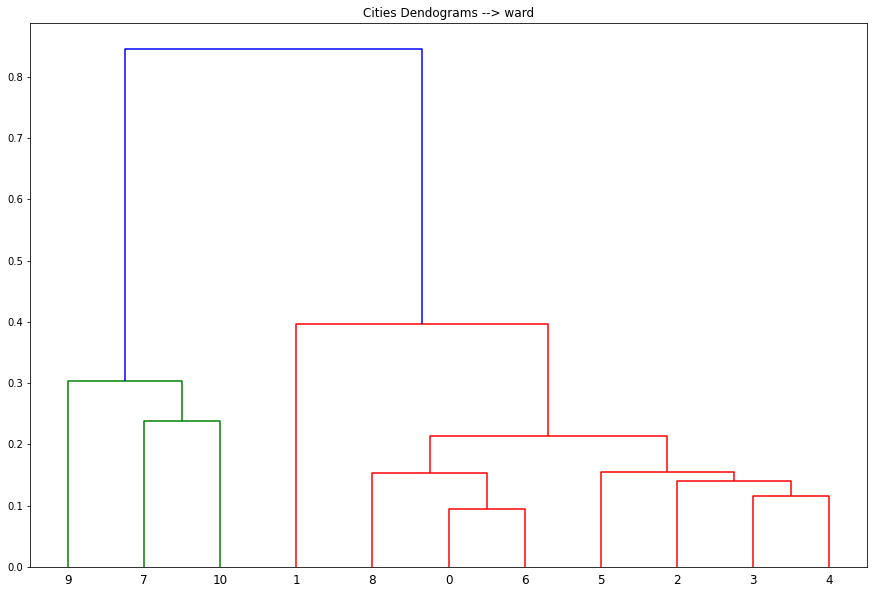

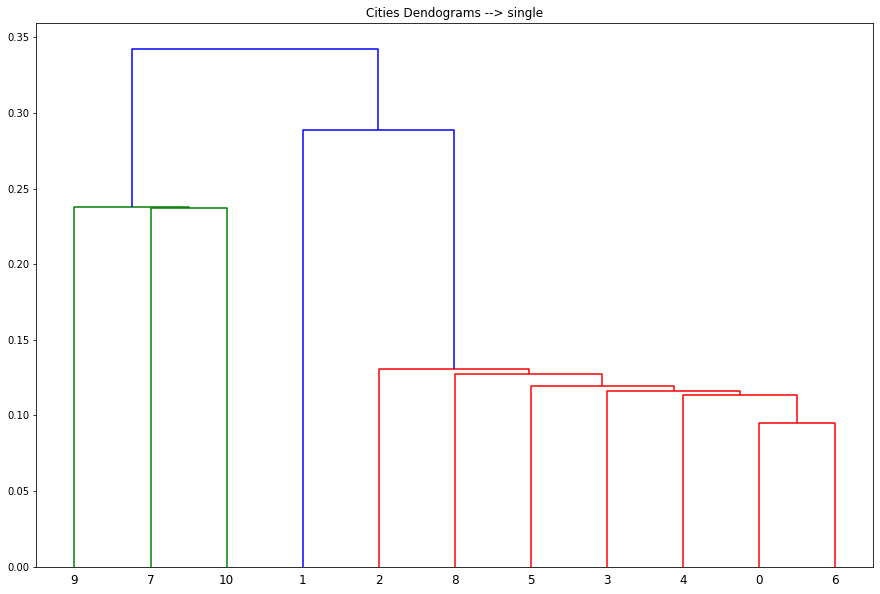

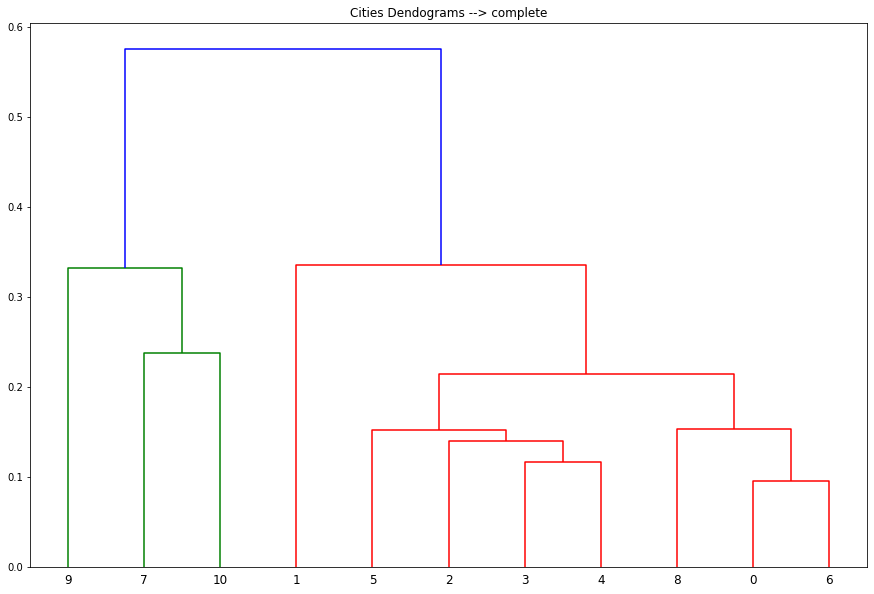

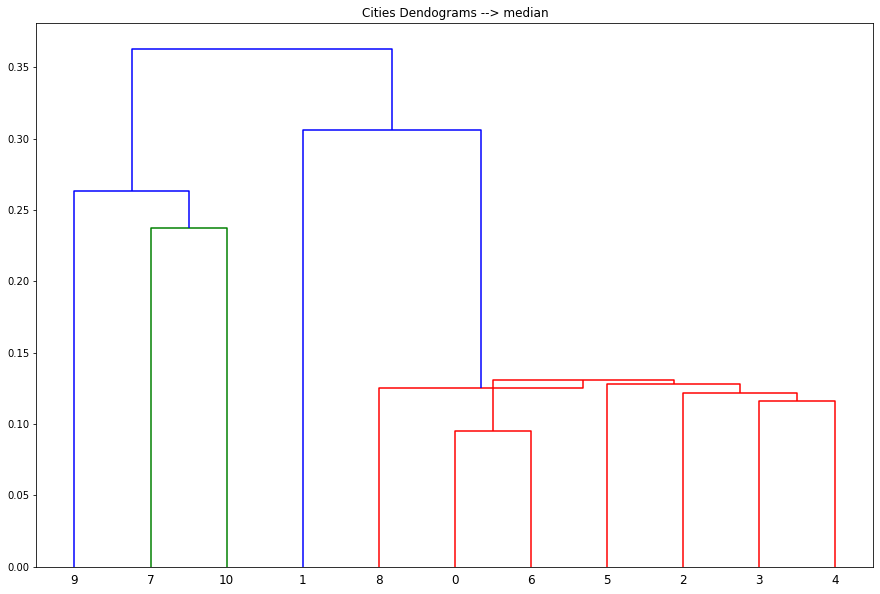

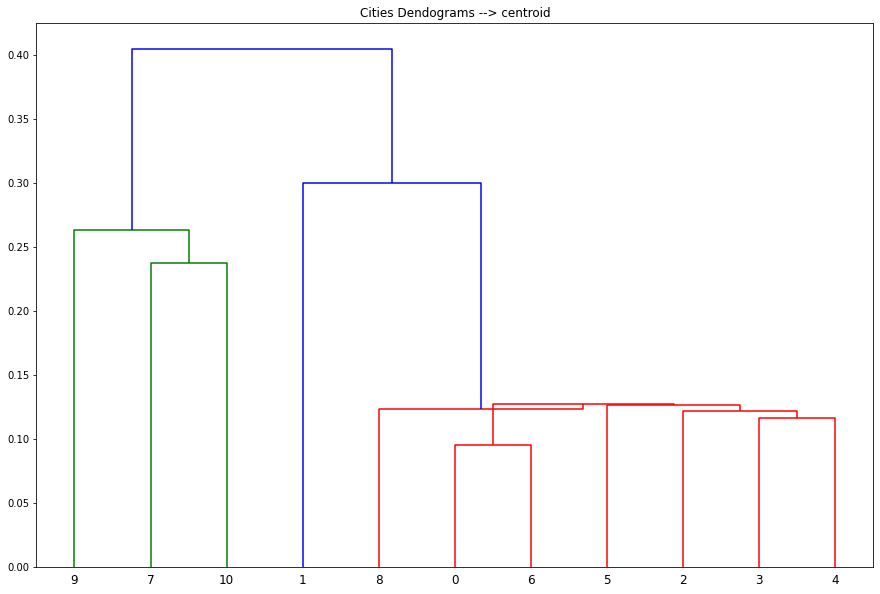

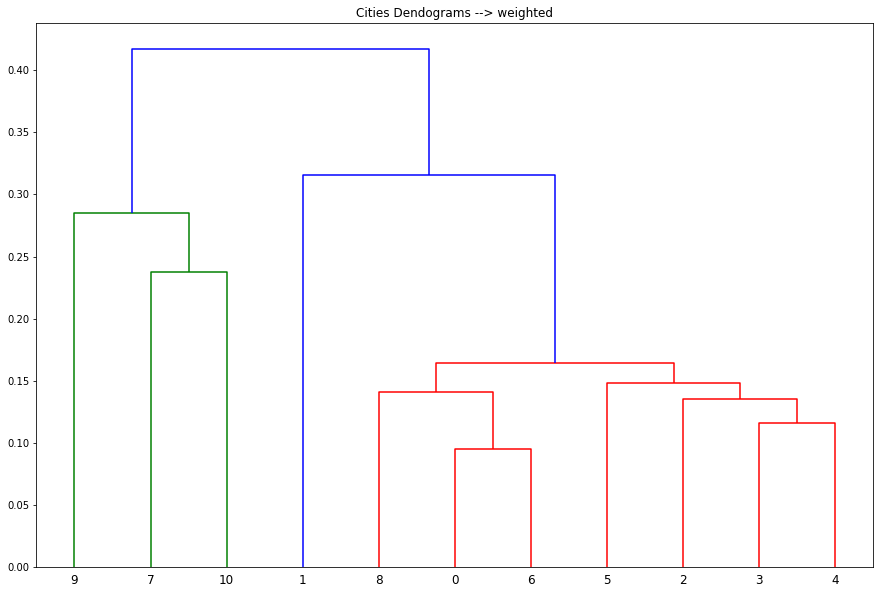

In [44]:
fig = plt.figure()
methods=['ward','single', 'complete','median','centroid','weighted']
for method, num in zip(methods, range(0,len(methods))):
    plt.figure(figsize=(15, 10))  
    plt.title("Cities Dendograms --> "+str(method))
    dend = shc.dendrogram(shc.linkage(X, method=method))
    plt.show()

#### Conclusion: except method single, other methods give more precise and same result . That is the  most similar as city 2 (Hamburg) is city 3 (Houston) and 4 (Los Angeles). In respect population, Houston has almost the same as Hamburg, LA has more than double than Hamburg. It could be also a reason for people to choose.